# Анализ и прогнозирование оттока клиентов для банка

На предоставленных данных из банка необходимо произвести анализ и спрогнозировать отток клиентов, для своевременного принятия мер по удержанию.


Признаки:
- RowNumber — индекс строки в данных;
- CustomerId — уникальный идентификатор клиента;
- Surname — фамилия;
- CreditScore — кредитный рейтинг;
- Geography — страна проживания;
- Gender — пол;
- Age — возраст;
- Tenure — сколько лет человек является клиентом банка;
- Balance — баланс на счёте;
- NumOfProducts — количество продуктов банка, используемых клиентом;
- HasCrCard — наличие кредитной карты;
- IsActiveMember — активность клиента;
- EstimatedSalary — предполагаемая зарплата.

Целевой признак:
- Exited — факт ухода клиента.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-предоставленных-данных" data-toc-modified-id="Изучение-предоставленных-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение предоставленных данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Произведём-кодирование-категориальных-признаков" data-toc-modified-id="Произведём-кодирование-категориальных-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Произведём кодирование категориальных признаков</a></span></li><li><span><a href="#Произведем-нормирование-величин" data-toc-modified-id="Произведем-нормирование-величин-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Произведем нормирование величин</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Выявления-дисбаланса-классов" data-toc-modified-id="Выявления-дисбаланса-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выявления дисбаланса классов</a></span></li><li><span><a href="#Выбор-модели-и-подбор-гиперпараметров" data-toc-modified-id="Выбор-модели-и-подбор-гиперпараметров-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Выбор модели и подбор гиперпараметров</a></span></li><li><span><a href="#Подсчет-метрик" data-toc-modified-id="Подсчет-метрик-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подсчет метрик</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом-и-поиск-наилучшей-модели" data-toc-modified-id="Борьба-с-дисбалансом-и-поиск-наилучшей-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом и поиск наилучшей модели</a></span><ul class="toc-item"><li><span><a href="#Корректировка-дисбаланса" data-toc-modified-id="Корректировка-дисбаланса-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Корректировка дисбаланса</a></span><ul class="toc-item"><li><span><a href="#Метод-upsampling" data-toc-modified-id="Метод-upsampling-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Метод upsampling</a></span></li><li><span><a href="#Метод-downsampling" data-toc-modified-id="Метод-downsampling-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Метод downsampling</a></span></li></ul></li><li><span><a href="#Проверим-на-уже-использованной-выше-модели-с-выбранными-гиперпараметрами-скорректированную-выборку." data-toc-modified-id="Проверим-на-уже-использованной-выше-модели-с-выбранными-гиперпараметрами-скорректированную-выборку.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Проверим на уже использованной выше модели с выбранными гиперпараметрами скорректированную выборку.</a></span><ul class="toc-item"><li><span><a href="#Используем-сбалансированную-выборку-методом-upsamling" data-toc-modified-id="Используем-сбалансированную-выборку-методом-upsamling-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Используем сбалансированную выборку методом upsamling</a></span></li><li><span><a href="#Используем-сбалансированную-выборку-методом-downsamling" data-toc-modified-id="Используем-сбалансированную-выборку-методом-downsamling-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Используем сбалансированную выборку методом downsamling</a></span></li></ul></li><li><span><a href="#Модель-логистической-регрессии-с-подбором-гиперпараметров" data-toc-modified-id="Модель-логистической-регрессии-с-подбором-гиперпараметров-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель логистической регрессии с подбором гиперпараметров</a></span></li><li><span><a href="#Модель-решающего-дерева-с-подбором-гиперпараметров" data-toc-modified-id="Модель-решающего-дерева-с-подбором-гиперпараметров-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Модель решающего дерева с подбором гиперпараметров</a></span></li></ul></li><li><span><a href="#Финальное-тестирование-наилучшей-модели" data-toc-modified-id="Финальное-тестирование-наилучшей-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Финальное тестирование наилучшей модели</a></span><ul class="toc-item"><li><span><a href="#Модель-Случайного-Леса" data-toc-modified-id="Модель-Случайного-Леса-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Модель Случайного Леса</a></span></li><li><span><a href="#Модель-Решающего-Дерева" data-toc-modified-id="Модель-Решающего-Дерева-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Модель Решающего Дерева</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

## Подготовка данных

In [1]:
import pandas as pd
from tqdm.notebook import tqdm

from sklearn.preprocessing import StandardScaler 

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

In [2]:
pash = 'C:/users/v_kly'

In [3]:
df = pd.read_csv(pash + '/datasets/Churn.csv')

### Изучение предоставленных данных

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Для обучения модели и предсказания класса нам не потребуются столбцы RowNumber (столбец с индексами, дубль), CustomerId (id клиента) и Surname (имя клиента). Исключим их из датафрейма. Предварительно убедимся, что нет дублей среди id клиентов.

In [6]:
df.CustomerId.nunique() 

10000

Количество уникальных id соответствует количеству строк, дублей нет.

In [7]:
data = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

### Предобработка данных

Посмотрим на уникальные значения некоторых столбцов.

In [8]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [9]:
data.Exited.unique() 

array([1, 0], dtype=int64)

Факт ухода. Категориальный признак, два бинарных значения, это мы и ожидаем увидеть, всё в порядке.

In [10]:
data.IsActiveMember.unique() 

array([1, 0], dtype=int64)

Активность клиента. Бинарный признак, два значения, всё ок.

In [11]:
data.HasCrCard.unique() 

array([1, 0], dtype=int64)

Наличие кредитной карты. Бинарный признак, всё ок.

In [12]:
data.NumOfProducts.unique() 

array([1, 3, 2, 4], dtype=int64)

Количество используемых продуктов. Четыре целочисленных значения, всё ок.

In [13]:
data.Tenure.unique() 

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

Продолжительность "жизни" клиента, целочисленные значения, есть пропуски, это было видно ранее, менее 10%.

Избавимся от пропусков в столбце `Tenure`

In [14]:
data = data.loc[~data['Tenure'].isna()]

In [15]:
data.Age.unique() 

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 22, 30, 28,
       65, 52, 48, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68, 75,
       23, 60, 63, 64, 70, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 81, 78,
       92, 83], dtype=int64)

Возраст клиента. Целочисленные значения, выпадающих значений нет, всё ок.

In [16]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

Пол клиента, два значения типа object. При использовании логистической регрессии потребуется кодирование.

In [17]:
data.Geography.unique() 

array(['France', 'Spain', 'Germany'], dtype=object)

Географическое расположение. Три значения типа object, потребуется кодирование.

In [18]:
data.CreditScore.unique() 

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 533, 553, 520, 722, 475, 490, 804, 582, 472, 465,
       556, 834, 660, 776, 829, 637, 698, 788, 601, 656, 725, 511, 614,
       687, 555, 603, 751, 581, 735, 661, 675, 738, 813, 657, 604, 519,
       664, 678, 757, 416, 665, 777, 506, 493, 750, 729, 646, 647, 808,
       524, 769, 515, 773, 814, 710, 623, 670, 622, 785, 605, 479, 685,
       562, 721, 628, 668, 828, 674, 625, 770, 758, 795, 686, 789, 589,
       461, 584, 579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539,
       706, 586, 631, 717, 683, 704, 615, 667, 484, 480, 512, 606, 597,
       778, 514, 730, 525, 715, 580, 807, 521, 759, 516, 711, 550, 618,
       643, 671, 689, 620, 676, 572, 695, 592, 694, 547, 594, 673, 610,
       767, 585, 763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771,
       681, 544, 766, 727, 557, 531, 498, 651, 791, 733, 811, 70

<AxesSubplot:ylabel='Frequency'>

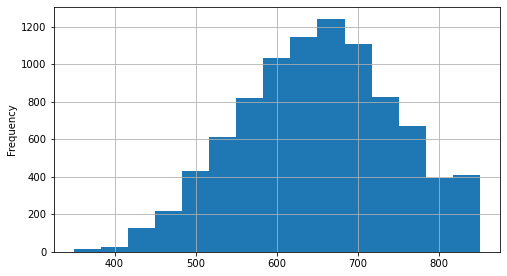

In [44]:
data.CreditScore.plot(kind='hist', grid=True, bins=15, figsize=(8,4.5))

In [30]:
data.CreditScore.describe()

count    9091.000000
mean      650.736553
std        96.410471
min       350.000000
25%       584.000000
50%       652.000000
75%       717.000000
max       850.000000
Name: CreditScore, dtype: float64

Кредитный рейтинг. Целочисленные значения, распределение близко к нормальному, выбросов нет, всё ок.

### Произведём кодирование категориальных признаков

Произведём прямое кодирование данных.

In [18]:
data = pd.get_dummies(data, drop_first=True) # Сбросим первые столбцы, для изежания дамми-ловушки

### Произведем нормирование величин

Прежде чем проводить стандартизацию, поделим выборку на тренировочную, валидационную и тестовую части.

In [19]:
features = data.drop('Exited', axis=1)
target = data['Exited']

features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.40, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_test, target_valid_test, test_size=0.50, random_state=12345)


In [20]:
print('Тренировочная выборка: признаки -', len(features_train), ', целевые значения -', len(target_train))
print('Валидационная выборка: признаки -', len(features_valid), ', целевые значения -', len(target_valid))
print('Тестовая выборка: признаки -', len(features_test), ', целевые значения -', len(target_test))

Тренировочная выборка: признаки - 5454 , целевые значения - 5454
Валидационная выборка: признаки - 1818 , целевые значения - 1818
Тестовая выборка: признаки - 1819 , целевые значения - 1819


Создадим объект класса `StandardScaler` и настроим его на обучающих данных.

In [21]:
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure']

scaler = StandardScaler()

scaler.fit(features_train[numeric])

StandardScaler(copy=True, with_mean=True, with_std=True)

Преобразуем обучающую, валидационную и тестовую выборки функцией transform().

In [22]:
features_train[numeric] = scaler.transform(features_train[numeric])

features_valid[numeric] = scaler.transform(features_valid[numeric])

features_test[numeric] = scaler.transform(features_test[numeric])

## Исследование задачи

### Выявления дисбаланса классов

Посмотрим на баланс классов по целевому признаку

In [23]:
data.Exited.mean()

0.2039379606203938

Как видно из значения выше: класс "1" занимает 1/5 часть всей выборки.

Попробуем обучить модель невзирая на явный дисбаланс классов, и посмотрим на результаты.,

### Выбор модели и подбор гиперпараметров

Используем для подбора гиперпараметров класс GridSearchCV.

Попробуем использовать модель случайного леса.

In [24]:
# Данная ячейка закомментирована по причине длительного исполнения (около 30 минут).
# Она полностью рабочая и свою функцию выполнила - гиперпараметры были подобраны.
# Комментирования было сделано для ускорения и удобства работы со всей тетрадью.

'''
%%time

parameters = {'n_estimators': range(1,51), 'criterion':('gini', 'entropy'), 'max_depth':range(1, 20)}

model = RandomForestClassifier(random_state=12345)

clf = GridSearchCV(estimator=model, param_grid=parameters, scoring='f1', cv=4)
clf.fit(features_train, target_train)
print('F-1 score модели случайного леса с наилучшими параметрами:', clf.best_score_)
clf.best_params_
'''

"\n%%time\n\nparameters = {'n_estimators': range(1,51), 'criterion':('gini', 'entropy'), 'max_depth':range(1, 20)}\n\nmodel = RandomForestClassifier(random_state=12345)\n\nclf = GridSearchCV(estimator=model, param_grid=parameters, scoring='f1', cv=4)\nclf.fit(features_train, target_train)\nprint('F-1 score модели случайного леса с наилучшими параметрами:', clf.best_score_)\nclf.best_params_\n"

### Подсчет метрик

Параметры подобраны. Теперь посчитаем различные метрики для данной модели на валидационной выборке.

In [25]:
model_forest = RandomForestClassifier(criterion='gini', max_depth=18, n_estimators=45, random_state=12345)
model_forest.fit(features_train, target_train)
predicted_valid = model_forest.predict(features_valid)

probabilities_valid = model_forest.predict_proba(features_valid) 
probabilities_one_valid = probabilities_valid[:, 1]

Построим ROC кривую и высчитаем площадь под ней.

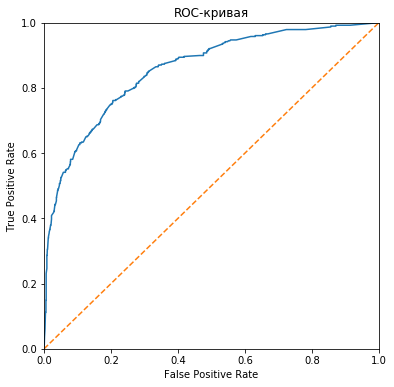

In [26]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(6,6))

plt.plot(fpr, tpr)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim(0, 1)                                        
plt.ylim(0, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

In [27]:
print('Значение ROC-AUC:', roc_auc_score(target_valid, probabilities_one_valid))

Значение ROC-AUC: 0.8571771739710672


Значение ROC-AUC впечатляет, но стоит проверить Полноту(`recall`) и Точность(`precision`)

In [28]:
print('Значение Precision:', precision_score(target_valid, predicted_valid))

Значение Precision: 0.7551020408163265


In [29]:
print('Значение Recall:', recall_score(target_valid, predicted_valid))

Значение Recall: 0.4907161803713528


Как видно из значений выше, модель не так частно ошибается в предсказании интересуюшего нас Первого класса ("1", метрика precision 0,75), но при этом модели не удается предсказать и половины значений целевого класса (49%, метрика recall)

Посчитаем совокупную метрику F1:

In [30]:
print('F-1 мера:', f1_score(target_valid, predicted_valid))

F-1 мера: 0.594855305466238


Значение далеко от идеального, не смотря на то, что метрика ROC-AUC сигнализировала о хорошем положении дел, вероятнее всего это связано с дисбалансом классов. Исправим это.

## Борьба с дисбалансом и поиск наилучшей модели

### Корректировка дисбаланса


#### Метод upsampling

Преобразуем данные с помощью метода `upsampling`, тем самым увеличив долю положительных классов в обучающей выборке, приблизительно сравняв ее с отрицательным классом.

Разделим обучающую выборку по классам: на отрицательные и положительные объекты.

In [31]:
features_zeros = features_train[target_train == 0]   # Срез по индексам двух объектов типа Series с одинаковыми индексами
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

Соединим полученные таблицы с мультипликатором для положительного класса.

In [32]:
repeat = 2
features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat) 

Теперь необходимо перемешать данные в соединенных таблицах, чтобы объекты одного класса не распологались подряд.

Применим метод `shuffle`

In [33]:
features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

#### Метод downsampling

Для сравления используем второй метод.

Преобразуем данные с помощью метода `downsampling`, тем самым уменьшив долю отрицательных классов в обучающей выборке, приблизительно сравняв ее с положительным классом.

Последовательность действий схожа: уменьшение таблиц объектов производим внутри метода соединения таблиц, после чего перемешиваем данные в склеенном датафрейме.

In [34]:
fraction = 0.25
features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

### Проверим на уже использованной выше модели с выбранными гиперпараметрами скорректированную выборку.

#### Используем сбалансированную выборку методом upsamling


In [35]:
model_forest = RandomForestClassifier(criterion='gini', max_depth=18, n_estimators=45, random_state=12345)
model_forest.fit(features_upsampled, target_upsampled)
predicted_valid = model_forest.predict(features_valid)

Посчитаем метрики для результатов на валидационной выборке.

In [36]:
probabilities_valid = model_forest.predict_proba(features_valid) 
probabilities_one_valid = probabilities_valid[:, 1]

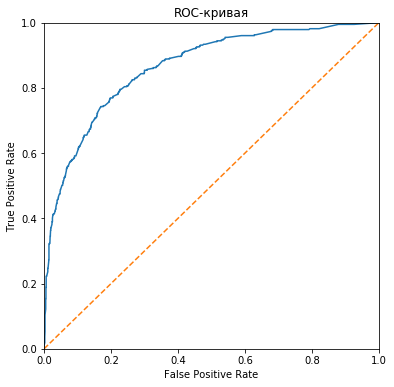

Значение ROC-AUC: 0.8639603355318016
Значение Precision: 0.6898954703832753
Значение Recall: 0.5251989389920424
F-1 мера: 0.5963855421686747


In [37]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(6,6))

plt.plot(fpr, tpr)


plt.plot([0, 1], [0, 1], linestyle='--')  # ROC-кривая случайной модели
plt.xlim(0, 1)                                        
plt.ylim(0, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

print('Значение ROC-AUC:', roc_auc_score(target_valid, probabilities_one_valid))
print('Значение Precision:', precision_score(target_valid, predicted_valid))
print('Значение Recall:', recall_score(target_valid, predicted_valid))
print('F-1 мера:', f1_score(target_valid, predicted_valid))

Удалось повысить метрику `Recall` - модель стала лучше предсказывать положительный класс на 3 процентных пункта.

Метрика F-1 улучшилась на 0,15 процентных пункта. Значение ROC-AUC также выросло на 0,68 процентных пункта.

#### Используем сбалансированную выборку методом downsamling

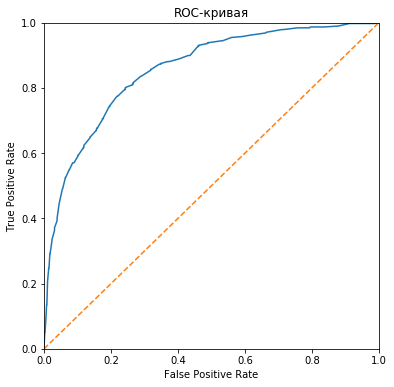

Значение ROC-AUC: 0.8561242653108933
Значение Precision: 0.4635658914728682
Значение Recall: 0.7931034482758621
F-1 мера: 0.5851272015655578


In [38]:
model_forest = RandomForestClassifier(criterion='gini', max_depth=18, n_estimators=45, random_state=12345)
model_forest.fit(features_downsampled, target_downsampled)
predicted_valid = model_forest.predict(features_valid)

probabilities_valid = model_forest.predict_proba(features_valid) 
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # ROC-кривая случайной модели
plt.xlim(0, 1)                                        
plt.ylim(0, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

print('Значение ROC-AUC:', roc_auc_score(target_valid, probabilities_one_valid))
print('Значение Precision:', precision_score(target_valid, predicted_valid))
print('Значение Recall:', recall_score(target_valid, predicted_valid))
print('F-1 мера:', f1_score(target_valid, predicted_valid))

Метрики на данной выборке исказились, контрольная метрика F-1 снизилась. Такое вероятно произошло из-за сильного снижения выборки, что привело к появлению искажений при обучении.

**В дальнейшем исследовании будем использовать выборку сбалансированную методом upsampling.***

### Модель логистической регрессии с подбором гиперпараметров

In [45]:
%%time
best_model_log_reg = None
best_result = 0
solver = None

for solv in tqdm({'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}):
        model_log_reg = LogisticRegression(
            random_state=12345, solver=solv
        ) 
        model_log_reg.fit(features_upsampled, target_upsampled) 
        predicted_valid = model_log_reg.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model_log_reg = model_log_reg
            best_result = result
            solver = solv
                
print('F-1 наилучшей модели на валидационной выборке:', best_result)
print()
print('Подобранные гиперпараметры для данной модели:')
print('solver =', solver)
print()


F-1 наилучшей модели на валидационной выборке: 0.46309696092619396

Подобранные гиперпараметры для данной модели:
solver = saga

CPU times: user 1.02 s, sys: 706 ms, total: 1.73 s
Wall time: 1.75 s


Метрика F-1 для модели Логистической Регресси на валидационной выборке уступает по значению метрике Случайного Леса на 0,13 процентных пункта.

### Модель решающего дерева с подбором гиперпараметров

In [49]:
%%time
best_model_tree = None
best_result = 0
max_depth = 0
criterion = None
splitter = None

for depth in tqdm(range(1, 40)):
    for crtrion in {'gini', 'entropy'}:
        for splt in {'best', 'random'}:
            model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth, criterion=crtrion, splitter=splt) 
            model_tree.fit(features_upsampled, target_upsampled)
            predicted_valid = model_tree.predict(features_valid)            
            result = f1_score(target_valid, predicted_valid)
            if result > best_result:
                best_model_tree = model_tree
                best_result = result
                max_depth = depth
                criterion = crtrion
                splitter = splt
                
print('F-1 наилучшей модели Решающего Дерева на валидационной выборке:', best_result)
print()
print('Подобранные гиперпараметры для данной модели:')
print('max_depth =', max_depth)
print('criterion =', criterion)
print('splitter =', splitter)
print()


F-1 наилучшей модели Решающего Дерева на валидационной выборке: 0.5973684210526317

Подобранные гиперпараметры для данной модели:
max_depth = 9
criterion = entropy
splitter = random

CPU times: user 4.72 s, sys: 48.4 ms, total: 4.77 s
Wall time: 5.1 s


Метрика F-1 модели Решающего Дерева на валидационной незначительно выигрывает по значению метрике Случайного Леса на 0,001 процентных пункта.

## Финальное тестирование наилучшей модели

Проведем финальное тестирование на двух моделях показавших себя наилучшим образом.

### Модель Случайного Леса

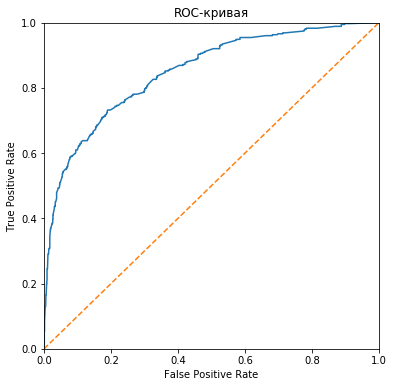

Значение ROC-AUC: 0.8489679157254089
Значение Precision: 0.7
Значение Recall: 0.5384615384615384
F-1 мера: 0.608695652173913


In [44]:
model_forest = RandomForestClassifier(criterion='gini', max_depth=18, n_estimators=45, random_state=12345)
model_forest.fit(features_upsampled, target_upsampled)
predicted_test = model_forest.predict(features_test)

probabilities_test = model_forest.predict_proba(features_test) 
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure(figsize=(6,6))

plt.plot(fpr, tpr)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim(0, 1)                                        
plt.ylim(0, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

print('Значение ROC-AUC:', roc_auc_score(target_test, probabilities_one_test))
print('Значение Precision:', precision_score(target_test, predicted_test))
print('Значение Recall:', recall_score(target_test, predicted_test))
print('F-1 мера:', f1_score(target_test, predicted_test))

### Модель Решающего Дерева

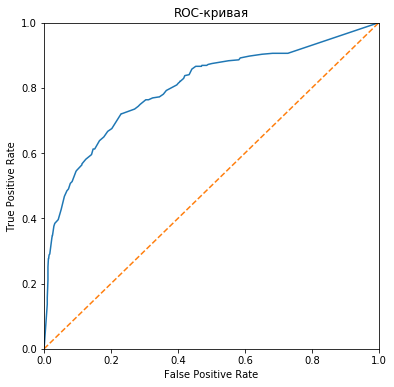

Значение ROC-AUC: 0.7999875792791322
Значение Precision: 0.5452054794520548
Значение Recall: 0.5669515669515669
F-1 мера: 0.5558659217877094


In [55]:
predicted_test = best_model_tree.predict(features_test)

probabilities_test = best_model_tree.predict_proba(features_test) 
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure(figsize=(6,6))

plt.plot(fpr, tpr)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim(0, 1)                                        
plt.ylim(0, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

print('Значение ROC-AUC:', roc_auc_score(target_test, probabilities_one_test))
print('Значение Precision:', precision_score(target_test, predicted_test))
print('Значение Recall:', recall_score(target_test, predicted_test))
print('F-1 мера:', f1_score(target_test, predicted_test))

### Вывод

**Вывод:** Наилучшие результаты показала модель Случайного Леса с гиперпараметрами `criterion='gini', max_depth=18, n_estimators=45`. На тестовой выборке результат **F-1** меры равен **0,6087**.

-------------------------------------------------------------------------------------------------------------------------

Значение `ROC-AUC` равное 0,8489 показывает, что выбранная модель существенно превосходит случайную (0,5) по соотношению правильных предсказаний первого класса к количеству ошибок.

Значение `Precision` равное 0,7 говорит о том, что модель правильно определяет первый класс в 70% случаев.

Значение `Recall` равное 0,5384 сигнализирует о том, что модель предсказывает/"находит"  54% значений первого класса из всего первого класса.